<a href="https://colab.research.google.com/github/zyberg2091/CV-tutorials/blob/master/Image%20Classification/Fashion_MNIST(CNN_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
mirrored_strategy

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [ ]:
data=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#adding a dimension as convolution accepts onlym3d images

x_train,x_test=np.expand_dims(x_train,-1),np.expand_dims(x_test,-1)


In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
#building a model
i=Input(shape=x_train[0].shape)
x=Conv2D(32, (3,3) ,strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(10)(x)

model=Model(i,x)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656

In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3032 - accuracy: 0.1180 - val_loss: 2.3026 - val_accuracy: 0.2233
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1202 - val_loss: 2.3026 - val_accuracy: 0.2233
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3032 - accuracy: 0.1213 - val_loss: 2.3026 - val_accuracy: 0.2233
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4390 - accuracy: 0.1076 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3740 - accuracy: 0.1035 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4030 - accuracy: 0.1048 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3243 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy:

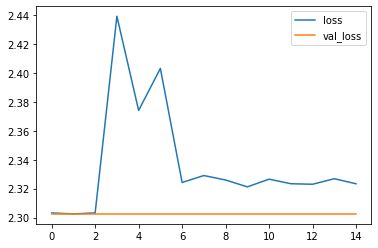

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

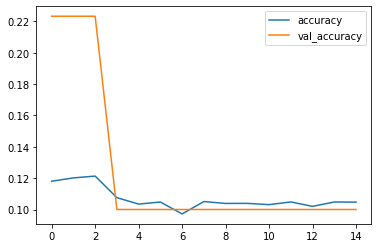

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()


In [ ]:
y_pred=model.predict(x_test)
y_pred[1]

array([ -59657.188,  -31758.266, -103345.54 ,  -95736.46 ,  -24023.602,
        -49555.535, -113520.47 , -121860.82 ,  -19086.637, -102022.086],
      dtype=float32)

In [ ]:
y_pred.shape,y_test.shape

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

In [ ]:
np.unique(y_train)

In [ ]:
#label mapping
labels='''T-shirts/Top 
          Trouser 
          Pullover 
          Dress 
          Coat 
          Sandal 
          Shirt 
          Sneaker 
          Bag 
          Ankleboot'''.split()

In [ ]:
labels

In [ ]:
#missclassified index
missclassified=np.where(y_pred!=y_test)[0]
print(missclassified)

In [ ]:
a=np.random.choice(missclassified)
plt.imshow(x_test[a].reshape(28,28),cmap='gray')
plt.title("label: %s , predicted: %s" % (labels[y_test[a]],labels[y_pred[a]]))

In [ ]:
print(x_test[a])